# Regularization

The methods that we have seen so far --- linear/polynomial regression for predicting continuous response variables and logistic regression for predicting (discrete) labels --- are called *supervised learning* algorithms because the models are trained using correctly labeled data. Today we will put this in a general context. We first explore the effect of *regularizing* our algorithms.

## Regularizing Linear Regression

Let's return to a toy example we've used previously, a noisy sine curve. For this example, let's use a more sparse sampling.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 25
X = np.random.uniform(0,np.pi,N) # Sample the x-axis uniformly
X = np.sort(X) # Useful for plotting later
y = np.sin(X) + np.random.normal(0,0.1,N) # Create a noisy sine curve

# Put the data into a form that sk-learn will like
X = X[:, np.newaxis]
y = y[:, np.newaxis]

plt.scatter(X,y)
plt.show()

<Figure size 640x480 with 1 Axes>

The data looks like a good candidate for polynomial regression. Remember, this is just a special case of linear regression, where we preprocess by creating feature vectors of the form $\vec{x}_j = (x_j,x_j^2,\ldots,x_j^d)$, where $d$ is the degree of the polynomial we will fit. 

Let's go overboard and fit a degree-10 polynomial.

In [4]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=10)
X_poly = polynomial_features.fit_transform(X)

Let's split the data into a training and a testing set to see how well this method of regression performs.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3)

We fit a model using the training data.



In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit( X_train, y_train )

It fits well on the training data!

In [7]:
model.score( X_train, y_train )

0.9885345255855129

Not so well on the testing set.



In [8]:
model.score( X_test, y_test )

-61.155932920181634

### Exercise

Plot the polynomial on the same plot with the training data scatterplot and the testing data scatterplot (use different colors for the scatterplots).

Does the discrepancy between these fitting scores make sense?

## Ridge Regularization



Perhaps unsurprisingly, when fitting a high-degree polynomial, we&rsquo;re
overfitting. "Regularization" is helpful here.

Our usual linear regression optimizes the *sum of squared residuals* loss function
$$
L(b, \beta_1,\ldots,\beta_d) = \frac{1}{2n}\sum_j \left((b + \beta_1 x_j + \beta_2 x_j^2 + \cdots + \beta_d x_j^d) - y_j\right)^2.
$$
The *Ridge regression algorithm* adds a *regularization* term to the loss function. We optimize
$$
\widetilde{L}(b, \beta_1, \ldots, \beta_d) = L(b,\beta_1,\ldots,\beta_d) + \alpha \left(b^2 + \beta_1^2 + \dots \beta_d^2\right),
$$
where $\alpha$ is a parameter to be chosen.

This is interpreted as penalizing the size of the weights in the polynomial. In other words, a more complex model incurs a higher cost. This promotes the optimization procedure to find a simpler model to fit the data.

In [9]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=1).fit( X_train, y_train )
# The default alpha is 1, so we didn't need to include it here. 
# It's included to just to illustrate the syntax.

It regularized model does worse on the training data.

In [10]:
model_ridge.score( X_train, y_train )

0.8978926630078043

But better on the testing set.



In [11]:
model_ridge.score( X_test, y_test )

0.4195599490660319

Comparing the coefficients, we see that the ridge regression coefficients are indeed much smaller in magnitude!

In [12]:
print(model.coef_)
print(model_ridge.coef_)

[[ 0.00000000e+00  5.32160665e+02 -2.98829805e+03  7.59169450e+03
  -1.10692995e+04  1.01507957e+04 -6.06592804e+03  2.36335362e+03
  -5.79470419e+02  8.12297875e+01 -4.96599337e+00]]
[[ 0.          0.22148481  0.17390374  0.11438153  0.04997399 -0.009127
  -0.04193142 -0.02644028  0.02120306 -0.00094464 -0.00067889]]


We see that the model which was fit by ridge regression doesn't have the huge deviation that came from fitting the noise without regularization.

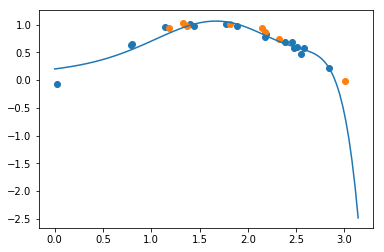

In [13]:
xs = np.linspace(0,np.pi,100)
xs = xs[:,np.newaxis]
xs_poly = polynomial_features.fit_transform(xs)

ys_predict = model_ridge.predict(xs_poly)
plt.plot(xs,ys_predict)

plt.scatter(X_train[:,1],y_train)
plt.scatter(X_test[:,1],y_test)

plt.show()

## Choosing alpha



Let&rsquo;s see how the fit depends on the choice of $\alpha$.



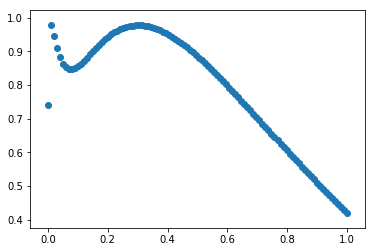

In [14]:
from sklearn.linear_model import Ridge

alphas = np.linspace(0.00001,1,100)
scores = []
for alpha in alphas:
    model = Ridge(alpha=alpha).fit( X_train, y_train )
    scores.append( model.score( X_test, y_test ) )

plt.scatter( alphas, scores )
plt.show()

### Aside: Improving Notation

At this point, it makes sense to switch to common notation involving matrix expressions for the loss functions. For the general multiple linear regression problem, our data takes the form $X = \{\vec{x}_1,\ldots,\vec{x}_n\}$, with $\vec{x}_j = (x_j^1,\ldots,x_j^d) \in \mathbb{R}^d$, and $y = \{y_1,\ldots,y_n\}$ with $y_j \in \mathbb{R}$. 

Let 
$$
X = \left(\begin{array}{ccccc}
1 & x_1^1 & x_1^2 & \cdots & x_1^d \\
1 & x_2^1 & x_2^2 & \cdots & x_2^d \\
\vdots & \vdots & \vdots & & \vdots \\
1 & x_n^1 & x_n^2 & \cdots & x_n^d \end{array}\right) = \left(\begin{array}{cc}
1 & \vec{x}_1^T \\
1 & \vec{x}_2^T \\
\vdots & \vdots \\
1 & \vec{x}_n^T \end{array}\right) \in \mathbb{R}^{n \times (d+1)}
$$
denote the *matrix of features*. Similarly, let
$$
\vec{w} = \left(\begin{array}{c}
b \\
\beta_1 \\
\vdots \\
\beta_d \end{array}\right) \in \mathbb{R}^{d+1}
$$
denote the *vector of weights* and 
$$
\vec{y} = \left(\begin{array}{c}
y_1 \\
\vdots \\
y_n \end{array}\right) \in \mathbb{R}^n
$$
the *vector of response variables*. 

Then
$$
X \vec{w} - \vec{y} = \left(\begin{array}{c}
b + \beta_1 x_1^1 + \cdots + \beta_d x_1^d - y_1 \\
b + \beta_1 x_2^1 + \cdots + \beta_d x_2^d - y_2 \\
\vdots \\
b + \beta_1 x_n^1 + \cdots + \beta_d x_n^d - y_n
\end{array}\right).
$$


Therefore the loss function for (unregularized) linear regression above can be written more simply as
$$
L(\vec{w}) = \frac{1}{2n} \|X\vec{w} - \vec{y}\|^2
$$
and the loss function for ridge regression becomes
$$
\widetilde{L}(\vec{w}) = \frac{1}{2n} L(\vec{w}) + \alpha \|\vec{w}\|^2.
$$

## LASSO Regression

We generate some new toy data below. Most of the toy data that we have used so far has been two or three-dimensional, allowing us to easily visualize it. In the real world we frequently deal with **high**-dimensional data. The data we generate below is 25-dimensional (by default, although this parameter can be changed).

In [15]:
import numpy as np

dimension = 25 # should be a perfect square
N = 1000

y = np.random.normal( 0, 1, size=N )

vs = np.linspace(0.01,2,dimension)
np.random.shuffle(vs)

xs = []
for v in vs:
    xs.append( np.random.normal(0,1) * np.random.normal( y, v ) )
X = np.array( xs ).transpose()

So we have $N$ ($1000$ by default) data points $(\vec{x}_j,y_j)$. Each $x_j$ is $25$-dimensional (by default).

In [16]:
# Take a look at one of the feature vectors
X[0]

array([-0.31359258, -0.4832771 ,  0.53681361, -0.08312324,  0.41950779,
       -0.92415636,  0.0506116 , -0.59268312,  0.79175619, -0.38695522,
       -1.57408482,  1.17380923,  0.14978281, -0.50962501, -2.43661804,
       -1.51109338,  1.27001067,  0.17498592, -0.46957247,  0.35360185,
        0.30276693, -1.53381694,  0.50334709, -2.87795824,  0.52628412])

In [17]:
# And the corresponding response value
y[0]

-0.9484588379938226

To visualize a scatterplot of $(\vec{x}_j,y_j)$'s, we would need to plot a point cloud in $26$ dimensions. Of course, this is impossible. We can get some sense of the data by making a scatterplot of the $y_j$'s against each coordinate of the $\vec{x}_j$'s.

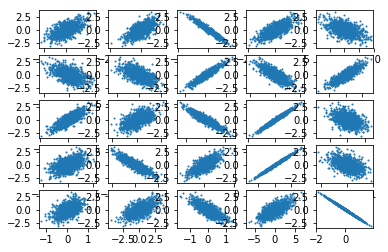

In [18]:
import matplotlib.pyplot as plt

grid = int(np.sqrt(dimension))
for i in range(dimension):
    plt.subplot(grid, grid, 1+i)
    plt.scatter(X[:,i], y, s=1 )
    
plt.show()

So the data is fairly complex, but we've constructed it to have lots of colinear structure. Let's perform linear regression.

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit( X, y )

Our model fits very well!

In [20]:
model.score(X, y)

0.9999042443341236

But it is arguably upsetting that the model coefficients are involving **all** the features of the data.



In [21]:
model.coef_

array([ 6.82345675e-04,  3.13508929e-04, -1.11096556e-03,  2.51451290e-04,
       -3.05978641e-04, -8.13132670e-04, -2.02224063e-03,  1.50798232e-03,
       -9.09314877e-04, -1.56583649e-04,  3.74487765e-06,  2.83173618e-04,
       -6.86114491e-03,  1.49628906e-03,  3.84845243e-05,  1.02254804e-04,
       -1.39574921e-03,  2.89692628e-04,  2.31339914e-02,  3.25493053e-05,
        1.10686367e-03, -2.75967814e-04, -6.59056302e-04,  4.15833780e-05,
       -1.76758666e+00])

## LASSO (Least Absolute Shrinkage and Selection Operator)



Our usual linear regression is the cost function
$$
\frac{1}{2n}\|X \vec{w} - \vec{y}\|^2.
$$

For *LASSO* we instead minimize the cost function
$$
\frac{1}{2n} \|X \vec{w} - \vec{y}\|_2 ^ 2 + \alpha \|\vec{w}\|_1.
$$
Once again, $\alpha$ is the regularization parameter. 

Recall that if $\vec{w} = (w_1,\ldots,w_m)$, then the *$\ell_1$-norm* is given by
$$
\|\vec{w}\|_1 = |w_1| + |w_2| + \cdots + |w_m|.
$$
Regularizing with $\ell_1$ penalty (i.e., adding a $\|\cdot\|_1$ term to the loss function) is *sparsity-promoting*; it favors weight vectors with lots of zero entries.



In [22]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1).fit( X, y )

Does this really change the coeffiicients at all?



In [23]:
model.coef_

array([ 0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.02538153,
        0.        , -0.        ,  0.11825617,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ])

We see that LASSO really has promoted sparsity in the coefficients. This is useful for explainability. This suggests that the response variables are really controlled for the most part by only a *few* of the features, rather than *all* of them, as unregularized linear regression might suggest.

### Exercise

Apply LASSO to the previous example (the noisy sine curve --- unless you changed something, the train/test data from that example should still be assigned to the relevant variables). You may need to adjust parameters; see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html.

What effect does it have on classification rate compared to ridge regression? Do the resulting coefficients make sense? Plot the fitting polynomial, like we did above.

## Regularizing Logistic Regression

Let's look again at the MNIST data to see the effect of regularization on Logistic regression. We first import the data.

In [24]:
from sklearn import datasets
digits = datasets.load_digits()

Recall that the data consists of many handwritten digits and their correct labels.

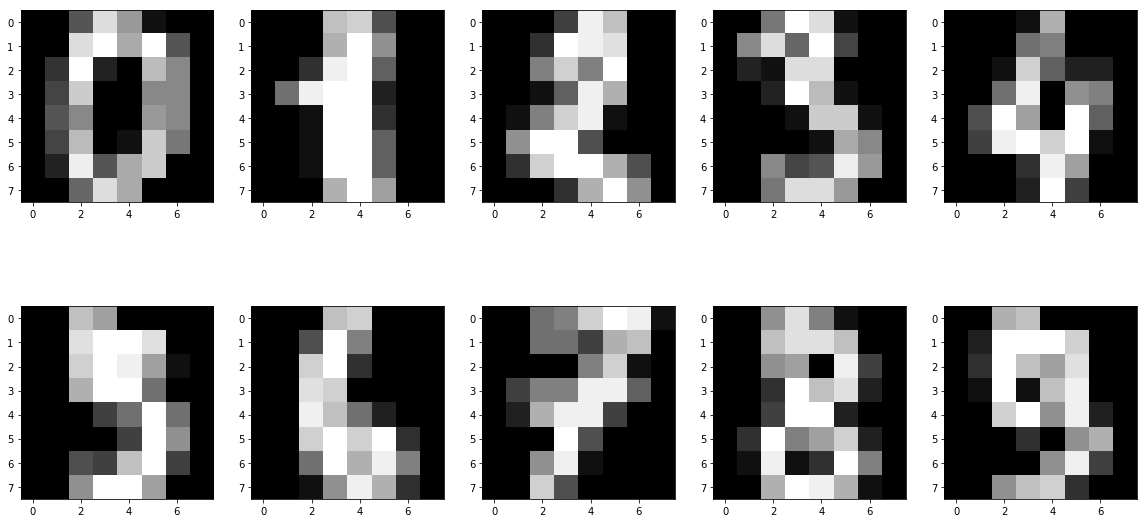

In [25]:
fig = plt.figure(figsize=(20,10))

for j in range(10):
    fig.add_subplot(2,5,j+1)
    plt.imshow(digits.images[j], cmap='gray')
    # imshow is a useful function. 
    # It treats an array of numbers as an image, with the number in each entry 
    # corresponding to a color.

We can treat each image as a vector in $\mathbb{R}^{8 \times 8} \approx \mathbb{R}^{64}$. Conveniently, `digits.data` reshapes each image into a 64 dimensional vector. This allows us to perform multiclass logistic regression to classify the data.

In [26]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

MNIST = digits.data
MNISTlabels = digits.target

MNIST_train, MNIST_test, MNISTlabels_train, MNISTlabels_test = train_test_split(MNIST, MNISTlabels, random_state=1)

model = LogisticRegression(solver='lbfgs', multi_class = 'multinomial', max_iter=10000)
model.fit(MNIST_train, MNISTlabels_train)

print(model.score(MNIST_train,MNISTlabels_train))
print(model.score(MNIST_test,MNISTlabels_test))

1.0
0.9688888888888889


Logistic regression performs extremely well! Once the classification model has been created, we have a list of coefficients for each label. Let's try to visualize what those coefficients are telling us about our data.

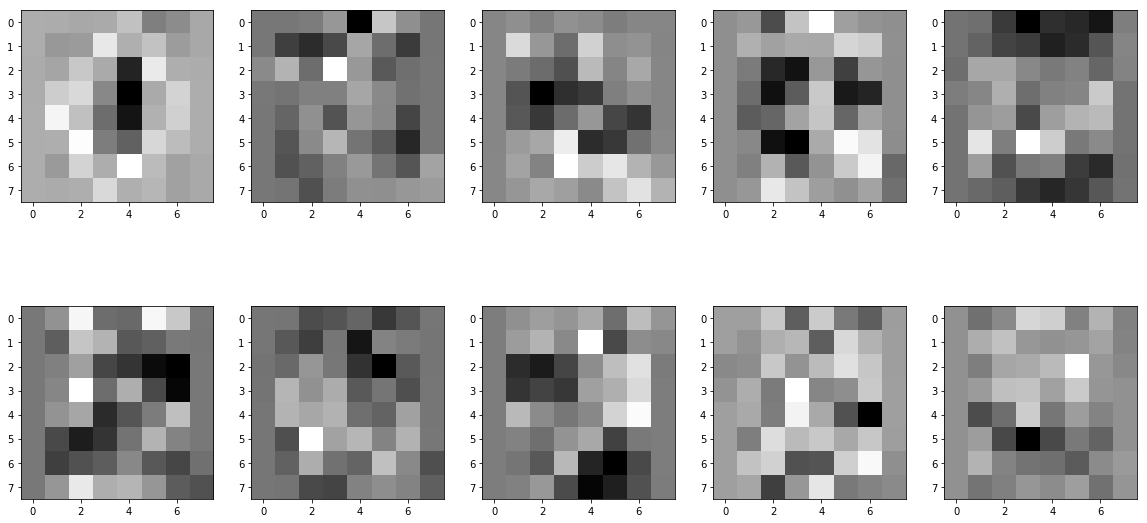

In [27]:
fig = plt.figure(figsize=(20,10))

for j in range(10):
    fig.add_subplot(2,5,j+1)
    plt.imshow(model.coef_[j].reshape(8,8), cmap='gray')

## $\ell_1$ Regularization

The `scikit-learn` logistic regression solver doesn't actually minimize the cross entropy function, but an $\ell_2$-regularized version. In the $2$-label setting, the loss function looks like
$$
\widehat{L}\left(\vec{w}\right) = L\left(\vec{w}\right) + \|\vec{w}\|^2 ,
$$
where $L(\vec{w})$ is our usual loss function for multiclass logistic regression. As in the case of linear regression, this penalizes large weights, which can help to avoid overfitting in the model.

Different types of regularization can be used. For example, the following code fits a model for the MNIST dataset with $\ell_1$ regularization, which has loss of the form
$$
\widetilde{L}\left(\vec{w}\right) =  L\left(\vec{w}\right) + \|\vec{w}\|_1.
$$

### Exercise

The code below will use $\ell_1$ regularization to fit a logistic regression model on MNIST. Fit the model, then study the effect. Does it change classification rate? How are the weight coefficients affected by the choice of regularization? Does this match your intuition coming from the linear regression example?

Note that I named the model `modelL1` so it won't overwrite the previous model.

In [28]:
modelL1 = LogisticRegression(solver='saga', multi_class = 'multinomial', max_iter=10000, penalty='l1')
modelL1.fit(MNIST_train, MNISTlabels_train)
#Note that we have to change the solver to `saga` to use this regularization.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=None, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

# A General Supervised Learning Framework

All of the methods that we have studied fit more-or-less into a common framework for *parametric supervised learning*.

#### Training Data 

Our training data is given as $X = \{\vec{x}_1,\ldots,\vec{x}_n\}$ and $Y = \{y_1,\ldots,y_n\}$, where $\vec{x}_j \in \mathbb{R}^d$ and $y_j$ can be continuously-valued (i.e., $y \in \mathbb{R}$) or discretely-valued (i.e., $y \in \{0,1,\ldots,K\}$). 

#### Model Selection

The goal is to find some function $f$ in a fixed class of functions with the greatest prediction accuracy $f(\vec{x}_j) \approx y_j$ on the training set. To make this precise, we must choose a class of functions, a loss function and a regularization.

- **Function Class:** Let $\mathcal{F}$ be some collection of prediction functions. The collection should be finite-dimensional in the sense that it is parameterized by finitely many weights $\vec{w} = (w_1,\ldots,w_m)$. That is, any such vector of weights determines exactly one function in $\mathcal{F}$ (and vice-versa).

- **Loss Function:** A function $L(\vec{w})$ which is minimized by the weight vector which produces the prediction function with the smallest prediction error. The form of the loss function depends on the data $X$ and $Y$. Generally $L$ is of the form $L = \sum_j \ell_j$, where $\ell_j$ measures the error in predicting label $y_j$ by $f(\vec{x}_j)$.

- **Regularization:** A function $R(\vec{w})$ which penalizes the complexity of the function determined by the weights $\vec{w}$. 

#### Training

We find our optimal function $f$ in the chosen class $\mathcal{F}$ by finding the minimum value of $L(\vec{w}) + R(\vec{w})$. The weights realizing the minimum determine our classification function. The optimization procedure is generally carried out by some variant of gradient descent.

#### Testing

There is usually another dataset $X',Y'$ set aside on which we can test the accuracy of the function we determined.



## Support Vector Machines

#### Motivation: Logistic Regression Revisited

For simplicity, consider data $X = \{\vec{x}_1,\ldots,\vec{x}_n\}$, $\vec{x}_j \in \mathbb{R}^d$, and $Y = \{y_1,\ldots,y_n\}$ with two labels ($y_j \in \{0,1\}$). Classification by logistic regression really just looks for the best hyperplane $\beta_1 x^1 + \beta_2 x^2 + \cdots + \beta_n x^d + b = 0$ for separating the data; "best" means that the weight vector $\vec{w} = (b,\beta_1,\ldots,\beta_d)$ minimizes the cross-entropy loss function.

Consider the following example.

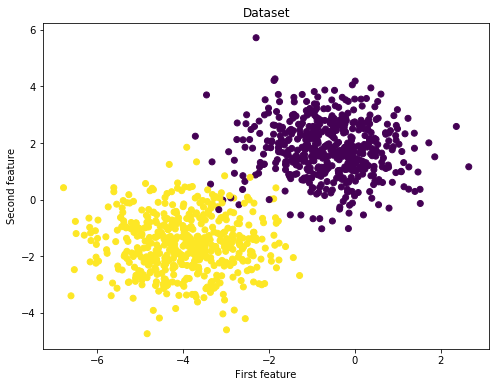

In [29]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(centers=2, n_samples = 1000, center_box = [-4,4], random_state=1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train);
model.score(X_test,y_test)

0.984

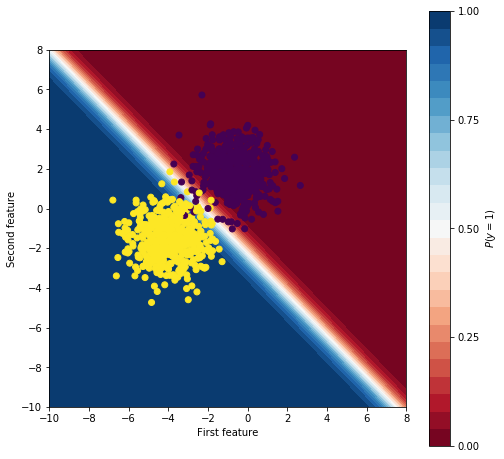

In [31]:
import numpy as np
xx, yy = np.mgrid[-10:10:.01, -10:10:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:,1], c=y)

ax.set(aspect="equal",
       xlim=(-10, 8), ylim=(-10, 8),
       xlabel="First feature", ylabel="Second feature");

The values of the probability function tell use that points on one side of the hyperplane get labeled $0$ and points on the other side get labeled $1$. 

#### Support Vector Machine

Support Vector Machine is another approach to finding a separating hyperplane. Given a weight vector $\vec{w} = (b,\beta_1,\ldots,\beta_d)$, our prediction function now takes the simplistic form
$$
h(\vec{x}) = \left\{\begin{array}{cc}
1 & b + \beta_1 x^1 + \cdots + \beta_d x^d \geq 0 \\
0 & \mbox{otherwise}\end{array}\right..
$$
I.e., the label of $\vec{x}$ is determined by the side of the hyperplane that it lives on.

For SVM, it is easier to write the loss function if we take our labels as $y_j \in \{-1,1\}$. In this case, the loss function is called *hinge loss* and is given by the formula
$$
L(\vec{w}) = \sum_j \max \{0,1-y_j(b + \beta_1 x^1 + \cdots + \beta_d x^d)\}.
$$

### Exercise

Does this loss function make sense? Consider the function
$$
g(p) = \max \{0, 1-y \cdot p\},
$$
where $y \in \{-1,1\}$. Think of $p$ as the "prediction"; if $p \geq 0$ we predict the label $1$ and if $p < 0$ we predict the label $-1$. The claim is that correct predictions yield small values of this function and incorrect predictions yield large values. Convince yourself of this by either creating a plot or testing the output for some relevant values of $y$ and $p$. 

SVM typically includes an $\ell_2$ regularization. It can be cast as an optimization problem of a smooth function on a constrained set. It can therefore be solved by some variant of gradient descent.

The SVM algorithm extends to multiclass classification by a one-versus-all algorithm. *Basically*, we train a classifier for each class, then the class of a sample is determined by a vote.

Let's test it on the toy data.

In [32]:
from sklearn.svm import SVC
modelSVM = SVC(kernel="linear",C=1)
# C is a regularization parameter. The default is C=1, so this is not necessary to include. It is here for demonstration.
modelSVM.fit(X_train, y_train)
print(modelSVM.score(X_test, y_test))

0.988


We can plot the *decision boundary* (i.e. the optimal separating hyperplane).

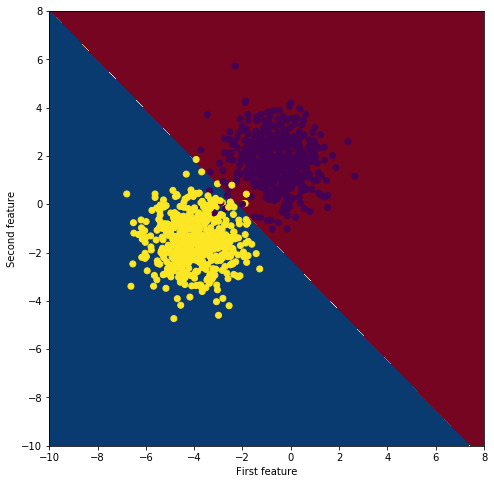

In [33]:
xx, yy = np.mgrid[-10:10:.01, -10:10:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = modelSVM.predict(grid).reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)


ax.scatter(X[:,0], X[:,1], c=y)

ax.set(aspect="equal",
       xlim=(-10, 8), ylim=(-10, 8),
       xlabel="First feature", ylabel="Second feature");

### Exercise

Fit a SVM model to the MNIST data, using the same test/train split as above. How do the classification results compare to logistic regression? How do the classification scores depend on the regularization parameter?

In general Logistic regression and SVM give different results. Generally SVM can be more successful for high-dimensional data and if the data has outliers. It is usually worthwhile to try both approaches.

## $k$-Nearest Neighbors

Another extremely simple supervised classification technique is called *$k$-Nearest Neighbors*. To determine the class of a vector $\vec{x}$, we look at the $k$ nearest points in the training data with respect to, say, Euclidean distance. The most common label amongst those is neighbors is then assigned to $\vec{x}$.

Let's try it on MNIST.

In [34]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(MNIST_train, MNISTlabels_train)
print(knn.score(MNIST_test, MNISTlabels_test))

0.9933333333333333


Remarks:
- This simple method does even better than logistic regression or SVM! In general, comparative performance of the models will depend on the application (i.e., kNN does worse than LR on some data).

- The fitting essentially takes no time, because all
`fit` does is store all the training data.  This results in &ldquo;large&rdquo;
models that require quite a bit memory.  

- For large datasets, `predict` is slow
if there are many points, because it is costly to search for nearby
neighbors.

- $k$-NN can also run into problems for high-dimensional data, due to the "Curse of Dimensionality" https://en.wikipedia.org/wiki/Curse_of_dimensionality

Another interesting thing about $k$-NN classification is that it doesn't actually require knowledge of the **vectors**, just the **distances** between them. This means that $k$-NN is well-defined in general metric spaces which may not be vector spaces. 

A *metric* is just a way to measure distance between pairs of points in some set (the *metric space*). More precisely, if the set is $X$, then the metric is a function $d:X \times X \rightarrow \mathbb{R}$ satisfying certain 'distance-like' axioms (see https://en.wikipedia.org/wiki/Metric_space).

Some alternative metrics on $\mathbb{R}^d$ are built in to `scikit-learn`. A list of them is available here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

### Exercise

Experiment with $k$-NN classification of MNIST by changing the parameters. In particular:

1) What happens if you change the number of neighbors? Make a plot of the classification rate over various values of $k$. 

2) Try some other metrics on $\mathbb{R}^{64}$. Which metric does the *worst* job?

## Limitations of Logistic Regression and SVM

It is easy to cook up data sets for which methods based on hyperplane decision boundaries are not suitable.

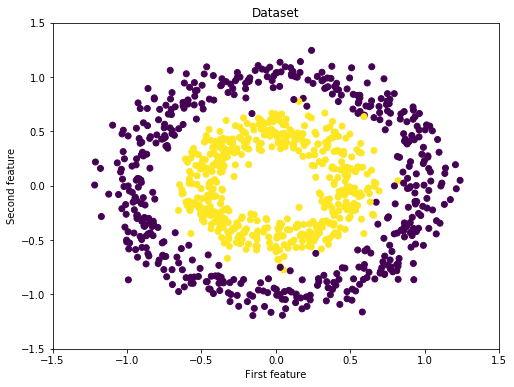

In [35]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.5, noise=.1, random_state=1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

Let's try to fit a logistic regression model to this data.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [37]:
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train);
model.score(X_test,y_test)

0.436

Not a very good classification score! This should intuitively make sense, since we are trying to split the data by a hyperplane. We can also see what's going wrong using the following plot.

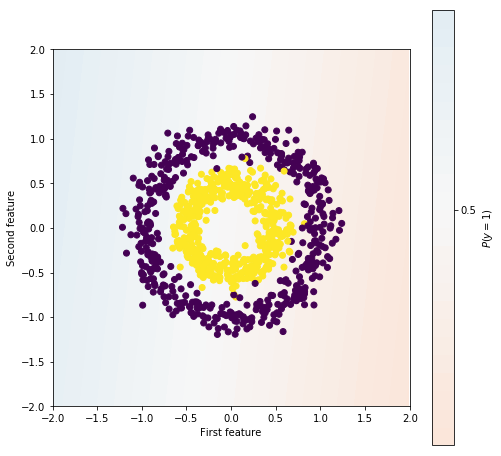

In [38]:
import numpy as np
xx, yy = np.mgrid[-2:2:.01, -2:2:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:,1], c=y)

ax.set(aspect="equal",
       xlim=(-2, 2), ylim=(-2, 2),
       xlabel="First feature", ylabel="Second feature");

We would expect that SVM also doesn't work on this data. 

In [39]:
modelSVM = SVC(kernel="linear", C=0.025)
modelSVM.fit(X_train, y_train)
print(modelSVM.score(X_test, y_test))

0.488


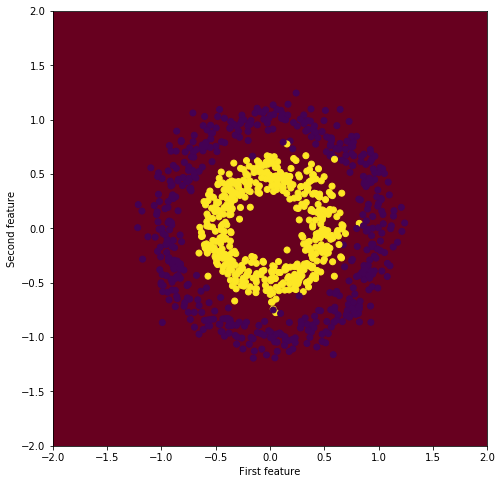

In [40]:
xx, yy = np.mgrid[-2:2:.01, -2:2:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = modelSVM.predict(grid).reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)

ax.scatter(X[:,0], X[:,1], c=y)

ax.set(aspect="equal",
       xlim=(-2, 2), ylim=(-2, 2),
       xlabel="First feature", ylabel="Second feature");

### Exercise

There are variants of Logistic Regression/SVM which will classify this data well. Here are a couple of things to try:

1) The `SVC` model we used above for SVM has several options that can be changed. Try digging into the documentation a little bit and try playing with the options to get better classification https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html. Hint: `kernel`

2) We did polynomial regression by using `PolynomialFeatures` to cast it as a linear regression problem. Try to do the same thing for logistic regression.

3) There are many more supervised learning algorithms that we won't have time to discuss in detail. *Neural networks* are another popular choice. These fall into the general supervised learning framework discussed above, where the prediction functions are complicated functions whose structure mimics the neuron structure of a brain. For example, you can try the `MLPClassifier` documented here: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

### Homework

The `fashion-mnist` is another interesting dataset for image classification. It contains preprocessed pictures of clothing items from 10 classes together with labels. The code below reads in and displays part of the `fashion-mnist` dataset. Explore this dataset and find which classification algorithm gives the best performance on it.

**Note:** You will have to figure out how to get the data into an appropriate form to train the models. 

**Note:** This dataset is a lot bigger than what we have been using. The training steps may take a while!

In [ ]:
import pandas as pd
import math
# Load the data.
data = pd.read_csv('fashion-mnist-demo.csv')

# Create the mapping between numeric category and category name.
label_map = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}

# Print the data table.
data.head(10)

In [ ]:
# Choose a number of images to display. Should be a perfect square to make the display look good.
numbers_to_display = 25

# Calculate the number of cells that will hold all the images.
grid_size = int(np.sqrt(numbers_to_display))

plt.figure(figsize=(10, 10))

# Go through the first images in a training set and plot them.
for plot_index in range(numbers_to_display):
    # Extrace image data.
    digit = data[plot_index:plot_index + 1].values
    digit_label = digit[0][0]
    digit_pixels = digit[0][1:]

    # Calculate image size (remember that each picture has square proportions).
    image_size = int(np.sqrt(digit_pixels.shape[0]))
    
    # Convert image vector into the matrix of pixels.
    frame = digit_pixels.reshape((image_size, image_size))
    
    # Plot the image matrix.
    plt.subplot(grid_size, grid_size, plot_index + 1)
    plt.imshow(frame, cmap='Greys')
    plt.title(label_map[digit_label])
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

# Plot all subplots.
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Homework

Load the 'Olivetti faces' dataset https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces. You can do this using the commands

`from sklearn.datasets import fetch_olivetti_faces`

`data = fetch_olivetti_faces()`

** Warning: ** This is a larger file and will take a minute to download. 

Train and test models for facial recognition based on this dataset. Try both logistic regression and $k$-NN. Which approach works better? Which pairs of faces confuse your models? For logistic regression, can you visualize what the coefficients are telling you?